## Import

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

In [2]:
from ML.utils.utils import *
from ML.utils.Data_preparator import Data_preparator
from ML.utils.Model_trainer import Model_trainer
from ML.utils.Model_evaluator import Model_evaluator
from physics.Iso_data_handler import Iso_data_handler


## Data preparation

This notebook contains the results of the model which are trained using all the data from MIST and filtered on the phases

In [3]:
iso_handler = Iso_data_handler("../../../../../../data/MIST_v1.2_vvcrit0.0_basic_isos/", 
                              ['log10_isochrone_age_yr', 'log_Teff', 'log_g', 'phase', 'metallicity', 'star_mass', 'log_R'], 
                              "MIST", reclassify=True)

iso_df = iso_handler.get_isochrone_dataframe()
display(iso_df)

Reading MIST dataframe from csv file...


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,3.486221,3.131342,-1.0,-0.25,0.100000,0.153402
1,5.0,3.487362,3.126808,-1.0,-0.25,0.102645,0.160326
2,5.0,3.489243,3.119367,-1.0,-0.25,0.107039,0.171785
3,5.0,3.491102,3.112165,-1.0,-0.25,0.111419,0.183099
4,5.0,3.492937,3.105143,-1.0,-0.25,0.115789,0.194305
...,...,...,...,...,...,...,...
1467117,10.3,4.402490,7.777159,6.0,0.50,0.532726,-1.806255
1467118,10.3,4.387132,7.783242,6.0,0.50,0.532730,-1.809295
1467119,10.3,4.371789,7.789130,6.0,0.50,0.532735,-1.812237
1467120,10.3,4.356480,7.794844,6.0,0.50,0.532741,-1.815091


In [4]:
phase_filtered_iso_df = Data_preparator.filter_data(iso_df, {'phase':[0, 2, 3, 4, 5]})
display(phase_filtered_iso_df)

,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,4.494412,4.346972,0.0,-0.25,13.584360,0.610679
1,5.0,4.497517,4.345776,0.0,-0.25,13.765512,0.614753
2,5.0,4.500556,4.344580,0.0,-0.25,13.942887,0.618755
3,5.0,4.504040,4.343050,0.0,-0.25,14.591712,0.624670
4,5.0,4.507576,4.341483,0.0,-0.25,15.426062,0.631187
...,...,...,...,...,...,...,...
1140739,10.3,3.425746,-0.551440,5.0,0.50,0.602856,2.384899
1140740,10.3,3.426469,-0.560350,5.0,0.50,0.598549,2.387797
1140741,10.3,3.427744,-0.566057,5.0,0.50,0.594116,2.389036
1140742,10.3,3.429413,-0.569225,5.0,0.50,0.589648,2.388981


In [5]:
X_train, X_ivs, y_train, y_ivs = \
    Data_preparator.split_data(phase_filtered_iso_df, x_cols=['log10_isochrone_age_yr', 'log_Teff', 'log_g', 'metallicity'], 
                               y_cols=['star_mass', 'log_R'], random_state=12, print_stats=True)

print(X_train.shape, X_ivs.shape)
print(y_train.shape, y_ivs.shape)

Training set statistics:
Range in train data for the mass parameter : 0.0999979840073621 - 298.5447575808816
Median value in train data for the mass parameter: 2.0816081316727946
Mean value in train data for the mass parameter: 7.558407372495925
Range in train data for the radius parameter : -0.9974747647513328 - 3.129269620812593
Median value in train data for the radius parameter: 1.4993114860984695
Mean value in train data for the radius parameter: 1.3944707591667809

Testing set statistics:
Range in test data for the mass parameter : 0.0999981896729906 - 296.5221171165397
Median value in test data for the mass parameter: 2.082595606409119
Mean value in test data for the mass parameter: 7.471864103970097
Range in test data for the radius parameter : -0.9974234436680278 - 3.1297545143214007
Median value in test data for the radius parameter: 1.5026448988619927
Mean value in test data for the radius parameter: 1.396340263115711

(855558, 4) (285186, 4)
(855558, 2) (285186, 2)


## Model training

### Linear regression

In [6]:
lr_evaluator = Model_evaluator("linear_regression", path="../../../../../../results/K_fold/")


Base train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.3333512379514473
RMSE :  16.7885674879178
MAE :  6.988910313277603
MedAE :  2.7343547993562622
CORR :  0.5773657750071854
MAX_ER :  257.21540163374084
Percentiles : 
  75th percentile :  9.185313998759973
  90th percentile :  15.617280085586943
  95th percentile :  18.21414883699739
  99th percentile :  69.78471008063474



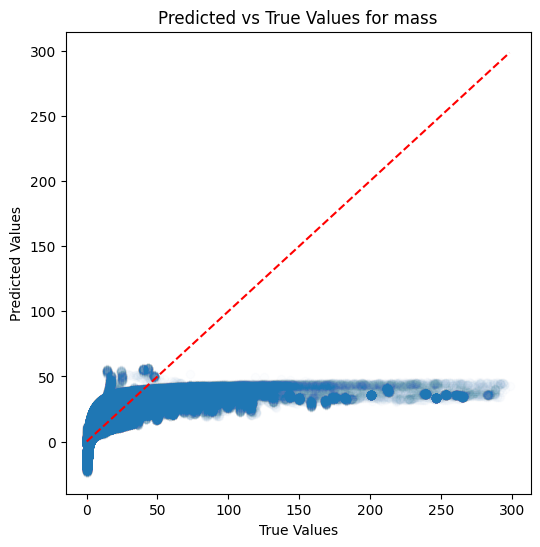

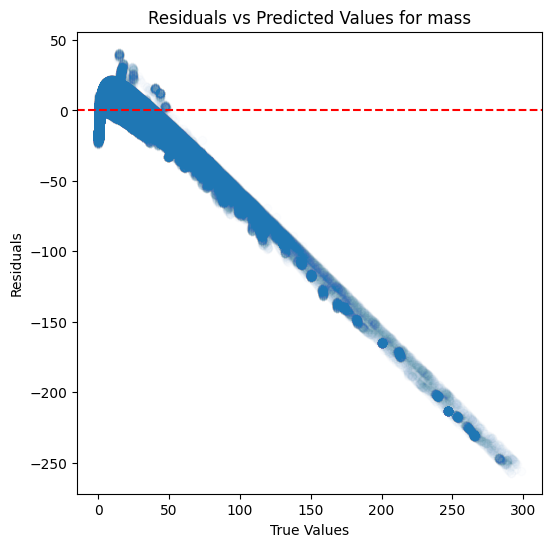

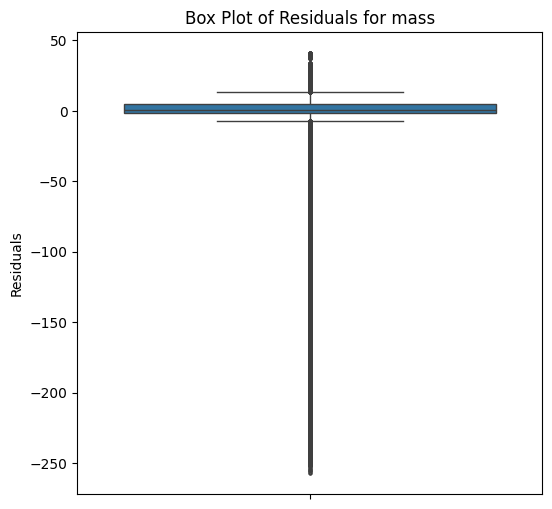

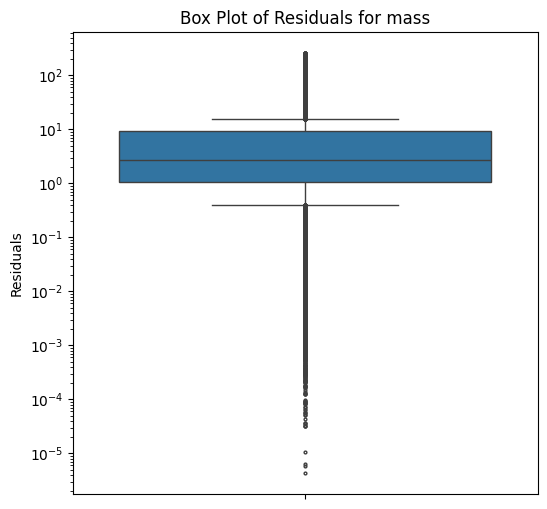

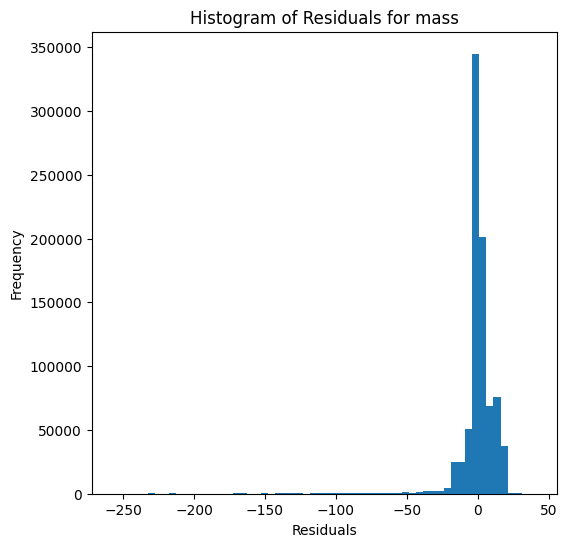

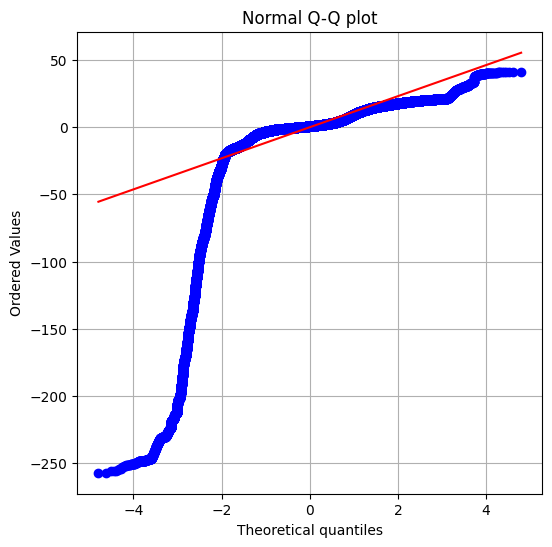


radius results:
RVE :  0.9897611137480969
RMSE :  0.09617751115675367
MAE :  0.07195174148370423
MedAE :  0.05483596363024501
CORR :  0.9948673850057176
MAX_ER :  0.48899646293087007
Percentiles : 
  75th percentile :  0.10008776536594953
  90th percentile :  0.15489263402054904
  95th percentile :  0.2013109382576544
  99th percentile :  0.28425901367673334



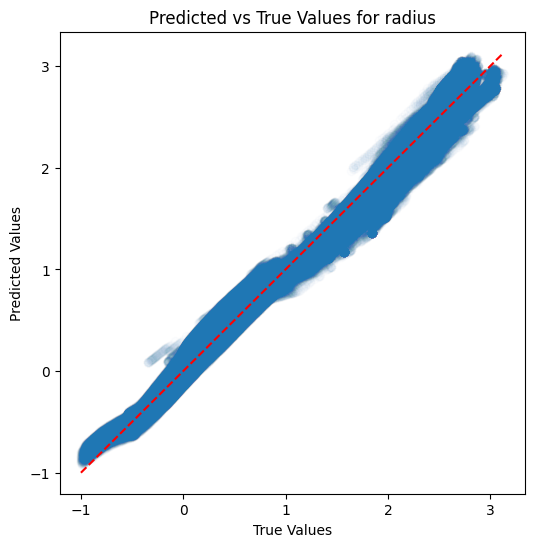

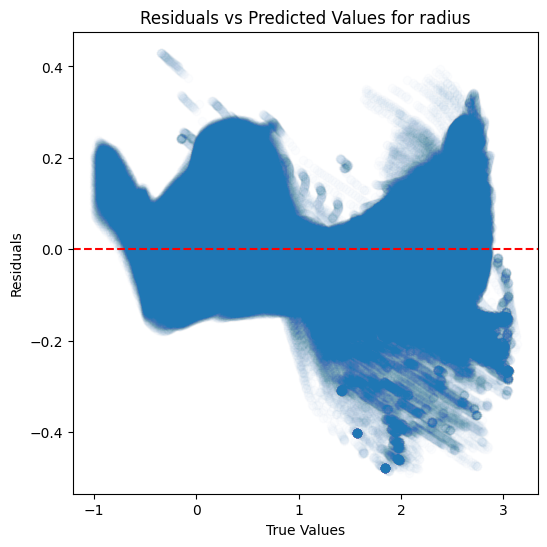

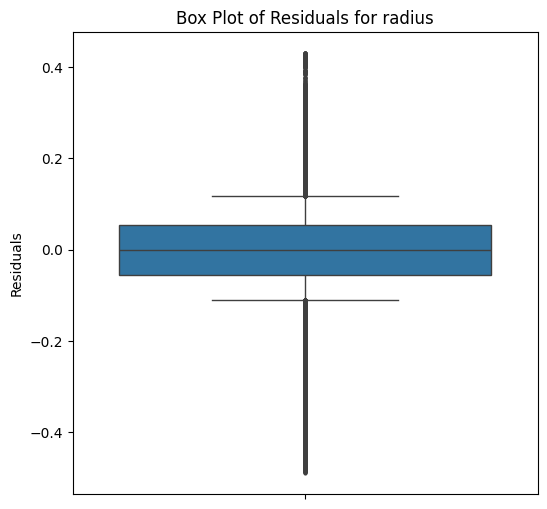

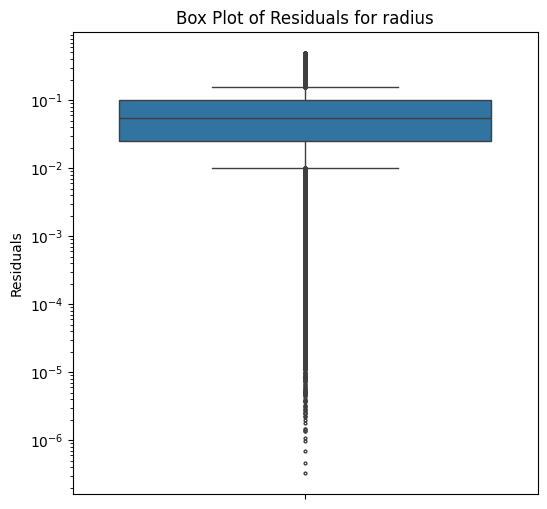

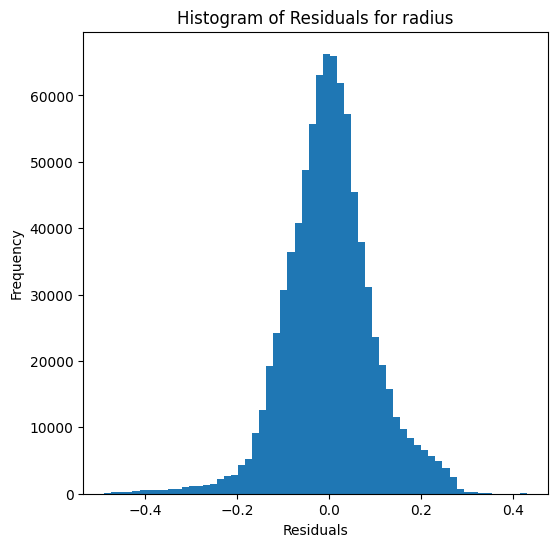

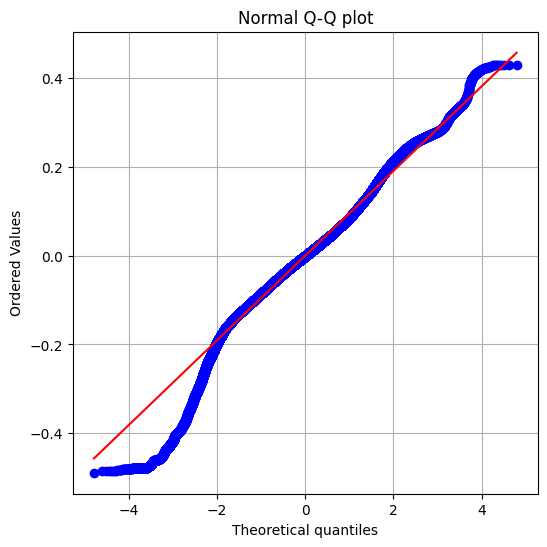

In [7]:
lr_evaluator.evaluate_Kfold_results(LinearRegression, X_train, y_train, "../../../../../../predictions/K_fold", "Base", random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### Decision tree

In [8]:
dt_evaluator = Model_evaluator("decision_tree", path="../../../../../../results/K_fold/")


Base train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9952927379052787
RMSE :  1.4107485106182531
MAE :  0.13403468456125694
MedAE :  0.005598416662787931
CORR :  0.9976464982192101
MAX_ER :  174.12419949937214
Percentiles : 
  75th percentile :  0.032757589454660785
  90th percentile :  0.13341681184834672
  95th percentile :  0.27339230387076746
  99th percentile :  2.118550363684232



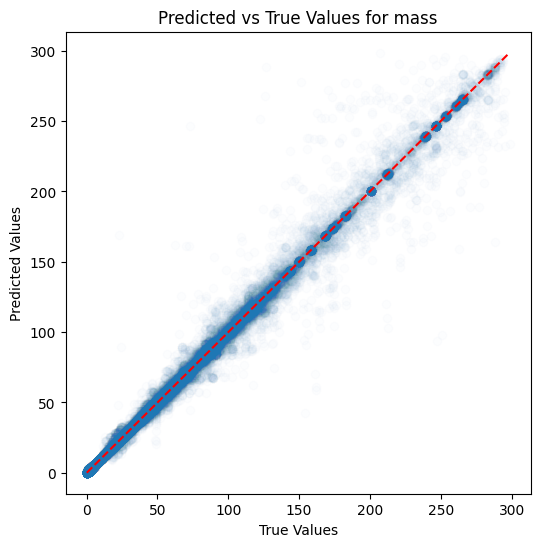

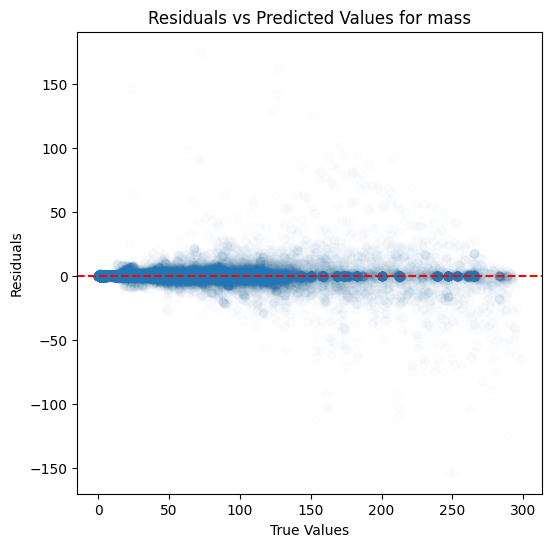

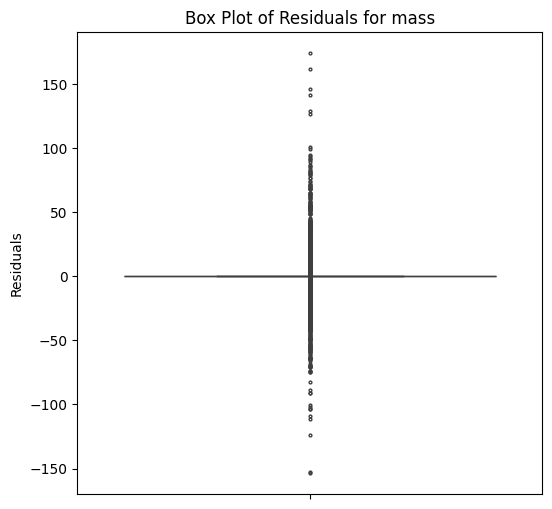

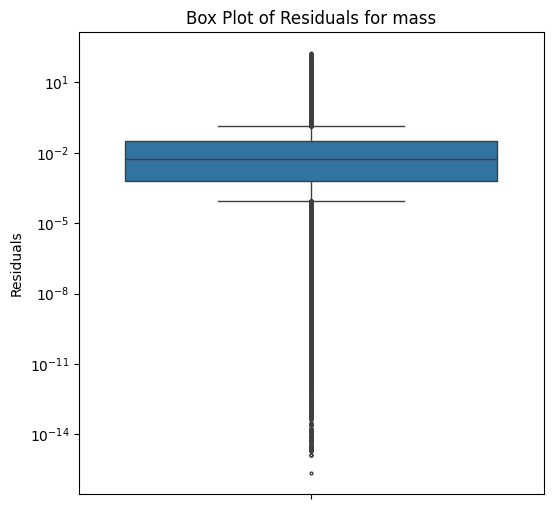

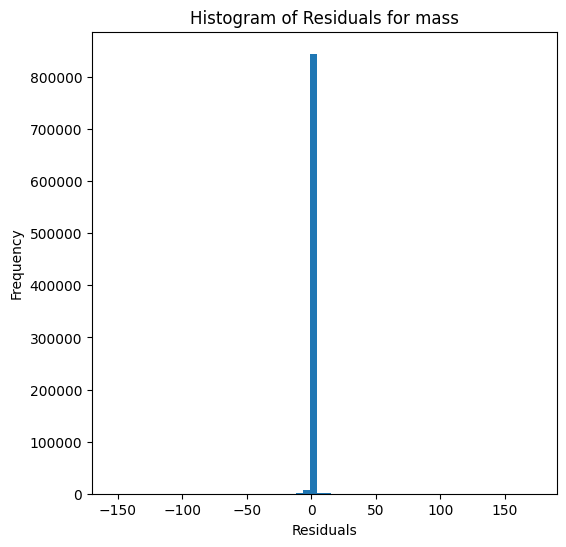

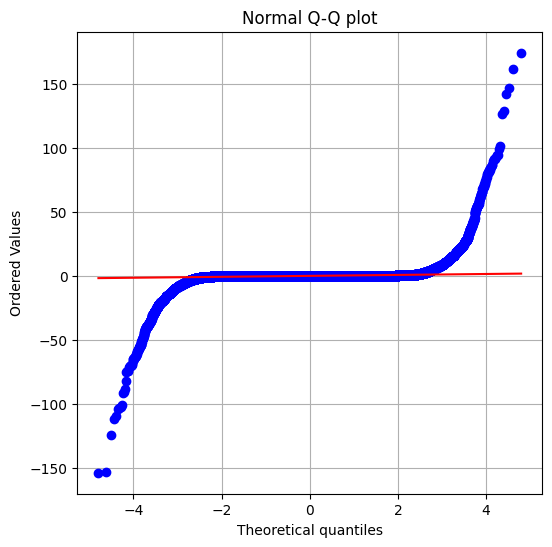


radius results:
RVE :  0.9997909260393799
RMSE :  0.01374358488112701
MAE :  0.007202660665975496
MedAE :  0.003570495436059695
CORR :  0.9998954950650433
MAX_ER :  0.4543867202727765
Percentiles : 
  75th percentile :  0.008297626909918893
  90th percentile :  0.016434104730051982
  95th percentile :  0.026097152798685876
  99th percentile :  0.05948299615291208



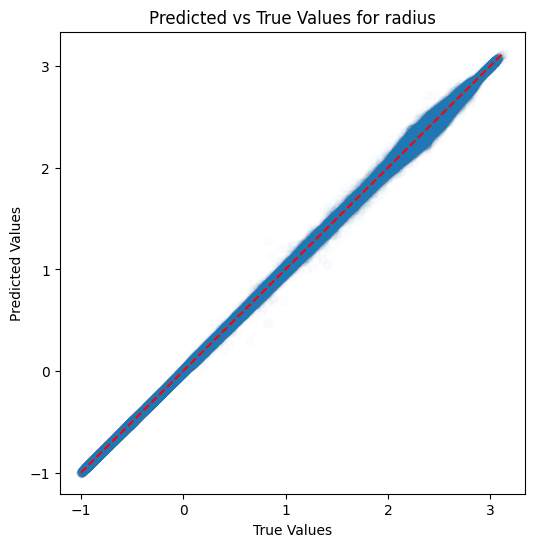

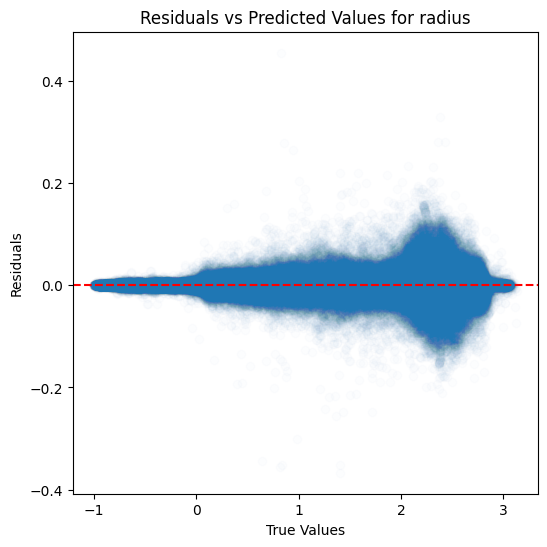

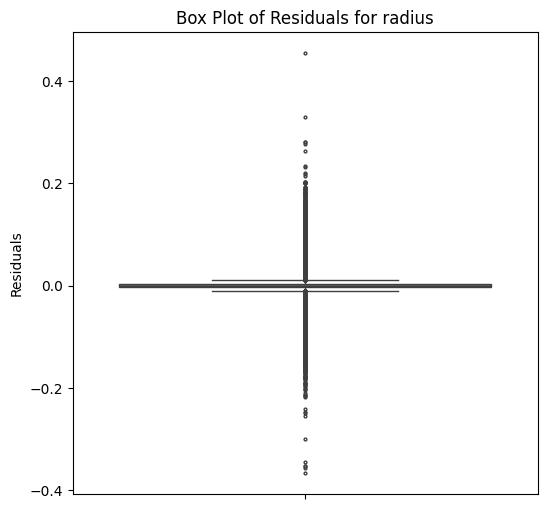

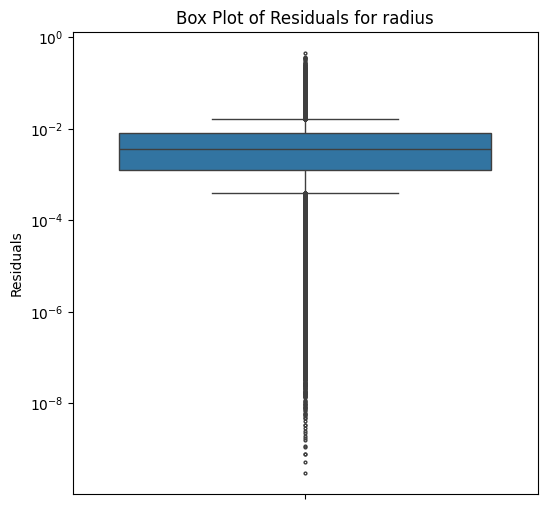

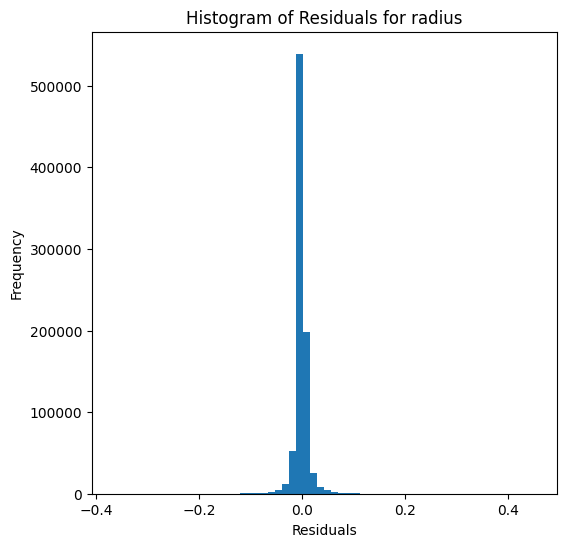

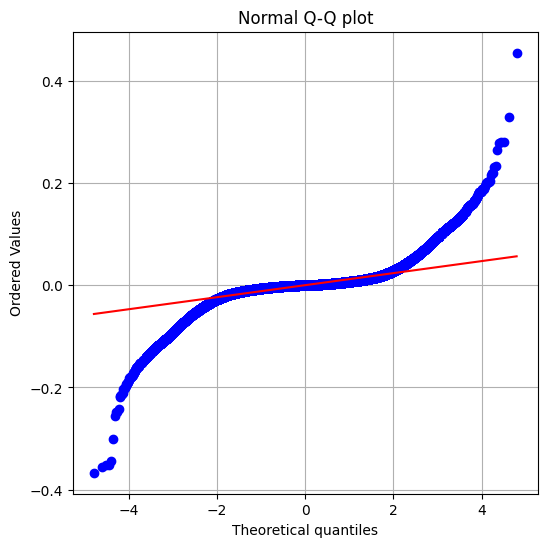

In [9]:
dt_evaluator.evaluate_Kfold_results(DecisionTreeRegressor, X_train, y_train, "../../../../../../predictions/K_fold", "Base", random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### K-nearest neighbours

In [10]:
knn_evaluator = Model_evaluator("KNN", path="../../../../../../results/K_fold/")


Base train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9904012013411723
RMSE :  2.014748025450398
MAE :  0.21071186542540438
MedAE :  0.01505124110864442
CORR :  0.9952822824321281
MAX_ER :  144.6135988878562
Percentiles : 
  75th percentile :  0.06683339486423123
  90th percentile :  0.19113748075401046
  95th percentile :  0.36535942817189593
  99th percentile :  3.451755078494614



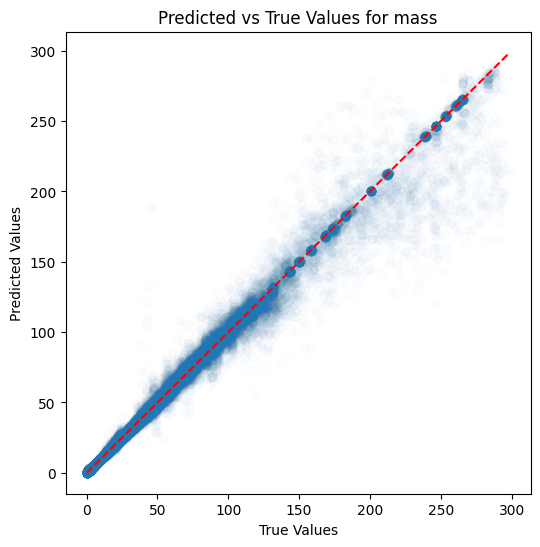

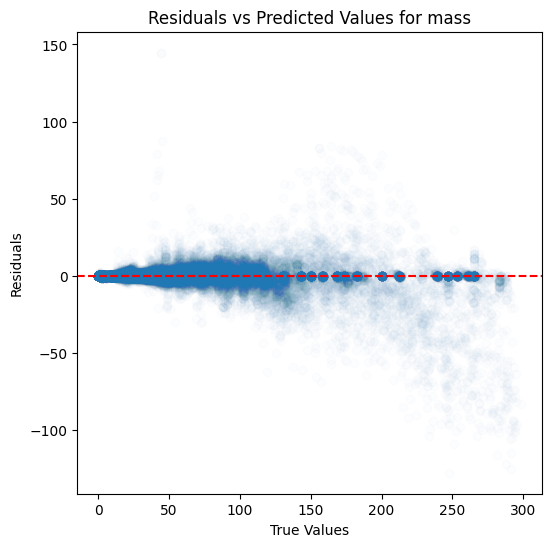

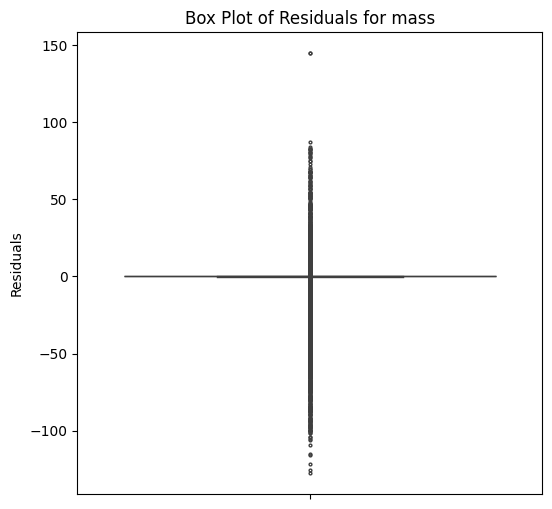

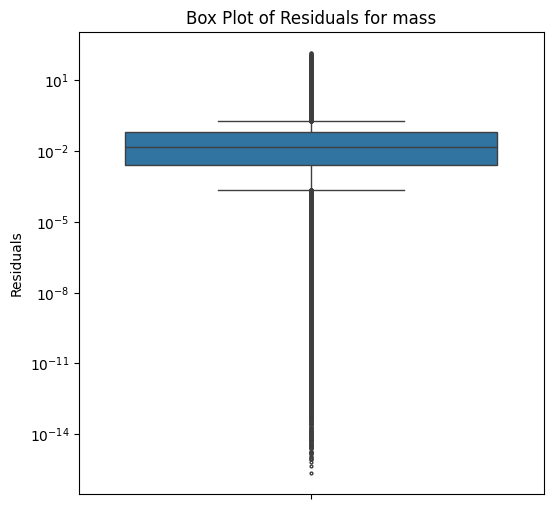

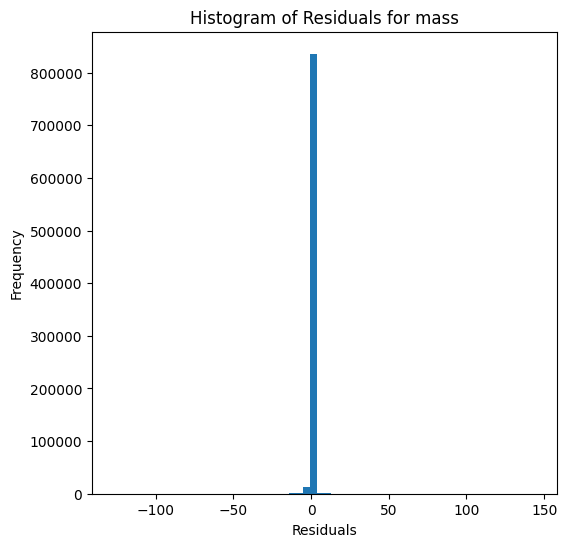

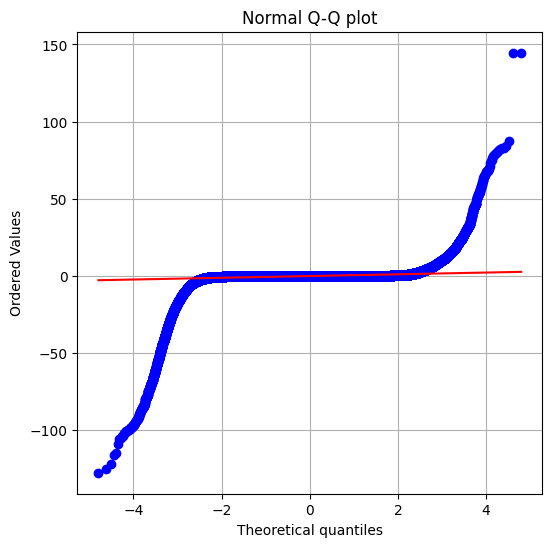


radius results:
RVE :  0.999833901666557
RMSE :  0.012250269140419087
MAE :  0.006476490638448258
MedAE :  0.00309317203967141
CORR :  0.9999169586890249
MAX_ER :  0.2990175210027979
Percentiles : 
  75th percentile :  0.0072309996878801575
  90th percentile :  0.0154644778263668
  95th percentile :  0.02467810106843051
  99th percentile :  0.05303865567124543



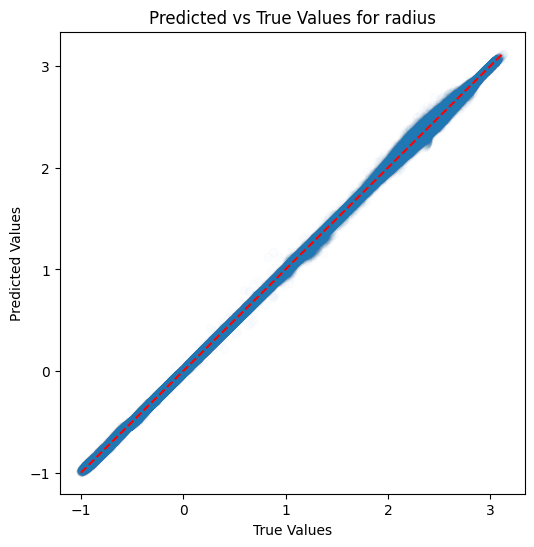

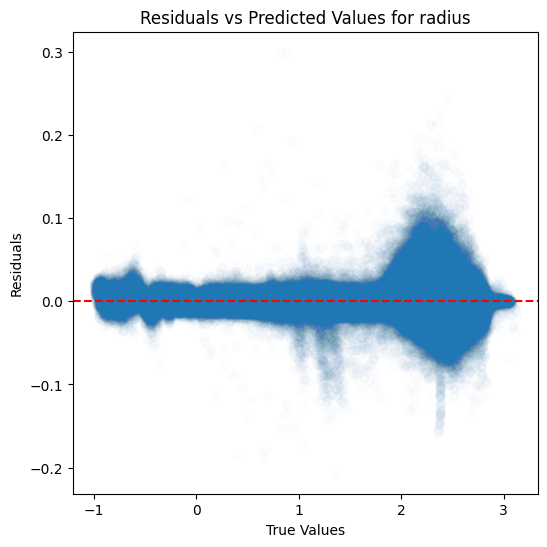

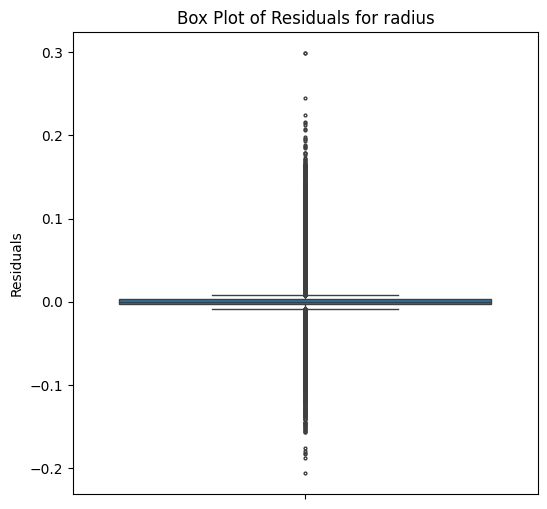

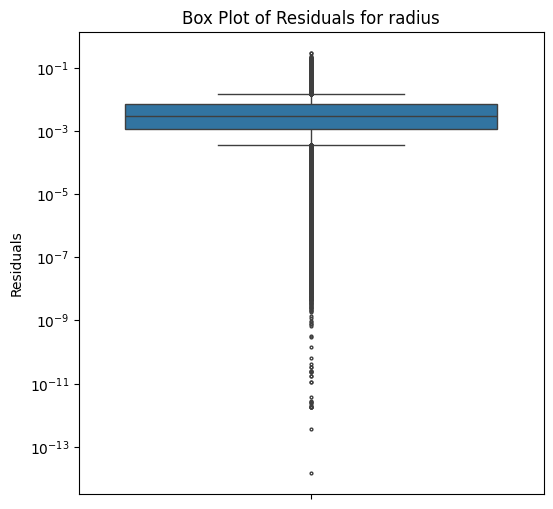

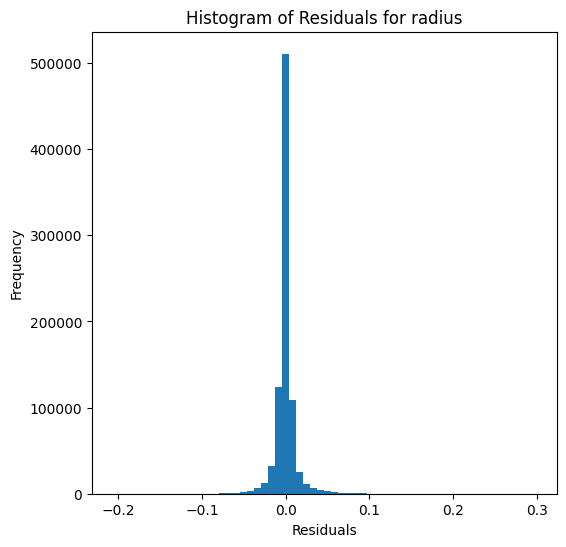

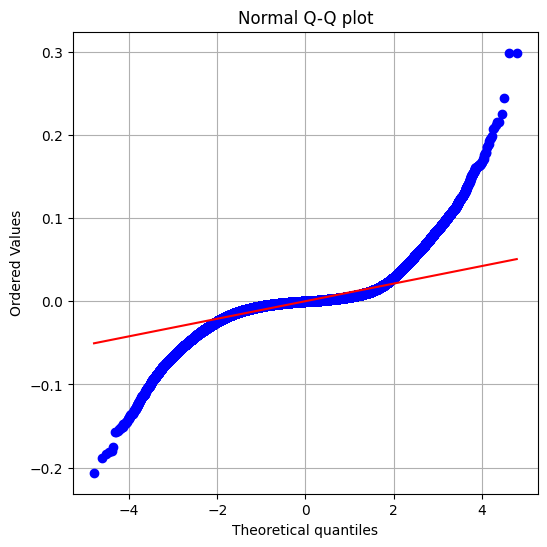

In [11]:
knn_evaluator.evaluate_Kfold_results(KNeighborsRegressor, X_train, y_train, "../../../../../../predictions/K_fold", "Base", random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### Random forests

In [12]:
rf_evaluator = Model_evaluator("random_forest", path="../../../../../../results/K_fold/")


Base train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9977643973789908
RMSE :  0.9722166581428168
MAE :  0.10273427352923568
MedAE :  0.008164193680380294
CORR :  0.9988825169774105
MAX_ER :  119.46296716432107
Percentiles : 
  75th percentile :  0.033782249934699304
  90th percentile :  0.10836343422836198
  95th percentile :  0.2068196458344621
  99th percentile :  1.6252597300650224



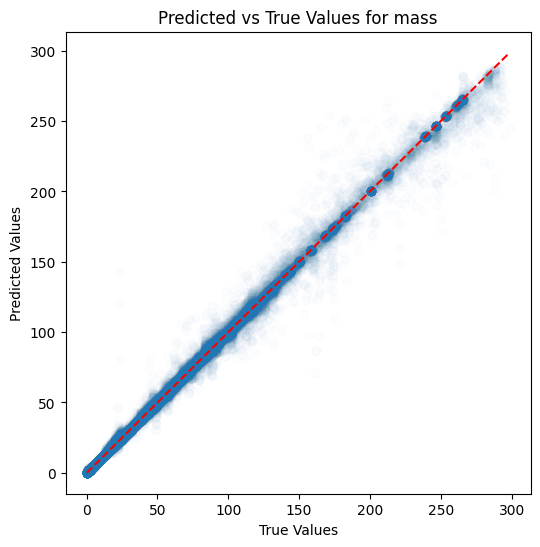

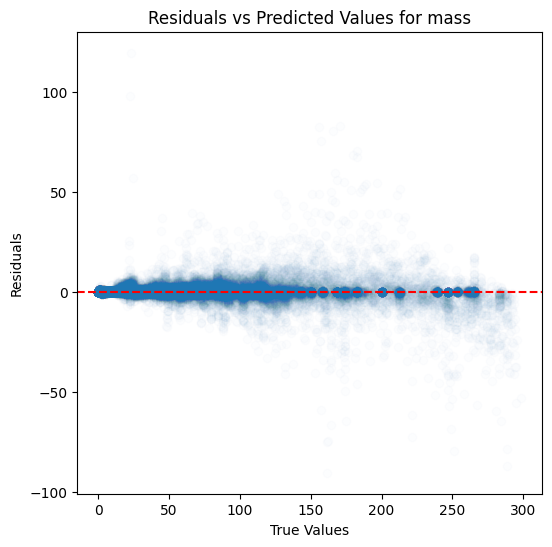

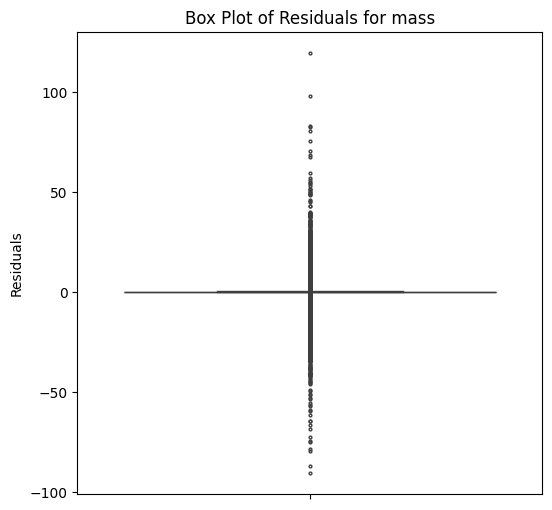

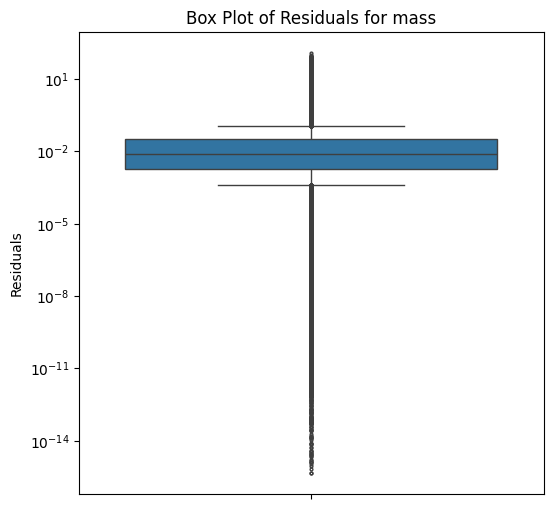

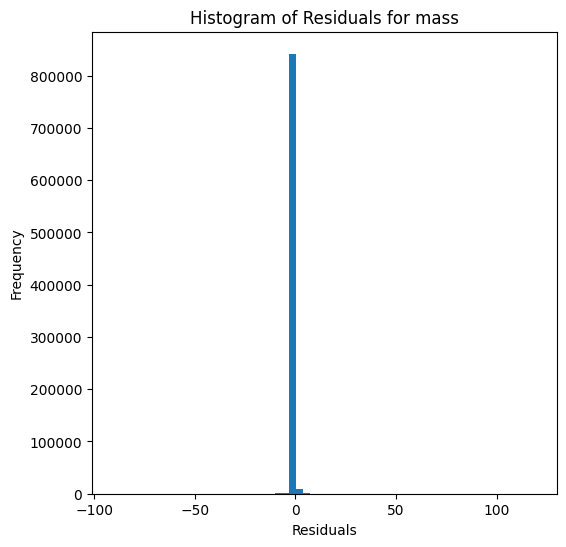

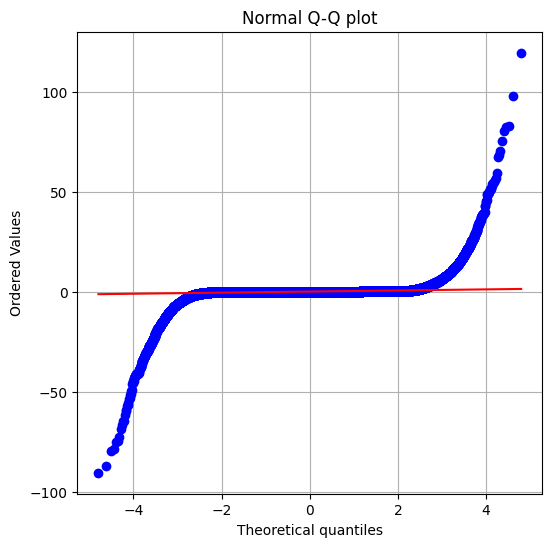


radius results:
RVE :  0.999904453912182
RMSE :  0.009291129066072832
MAE :  0.004568449003201065
MedAE :  0.0018879824602930917
CORR :  0.9999522318952349
MAX_ER :  0.366220162043867
Percentiles : 
  75th percentile :  0.0050056658111296
  90th percentile :  0.011244030213157653
  95th percentile :  0.01783564716649008
  99th percentile :  0.040308256474489386



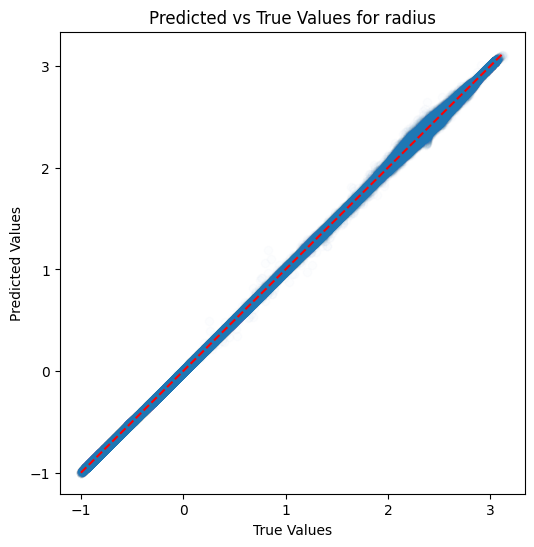

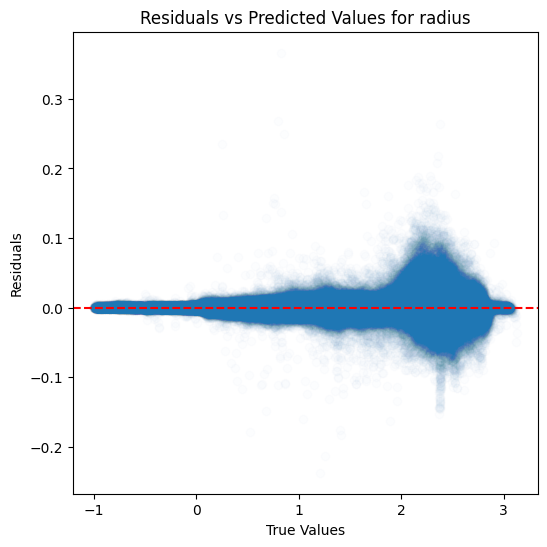

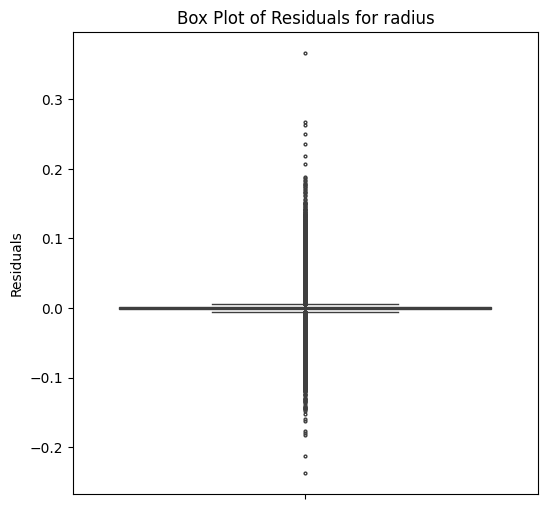

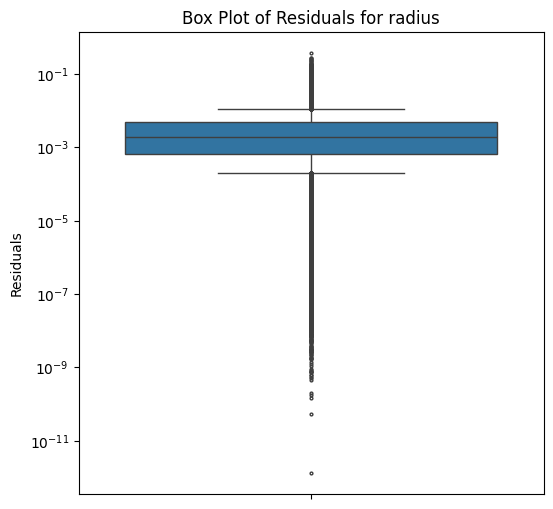

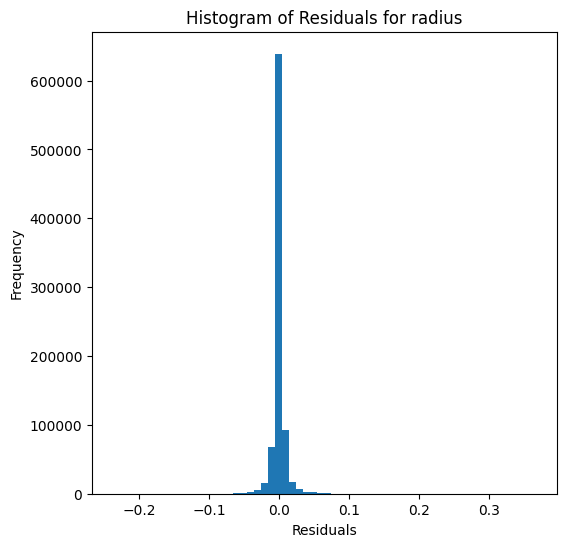

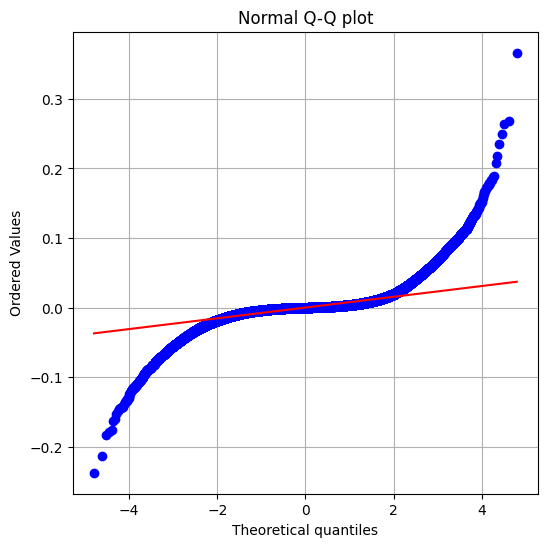

In [13]:
rf_evaluator.evaluate_Kfold_results(RandomForestRegressor, X_train, y_train, "../../../../../../predictions/K_fold", "Base", random_state=12, override=True, use_preds=False, n_jobs=5) #, override=False, use_preds=True)

### XGBoost

In [14]:
xgb_evaluator = Model_evaluator("xgboost", path="../../../../../../results/K_fold/")


Base train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9932547997098302
RMSE :  1.6887390138803715
MAE :  0.40083146586145013
MedAE :  0.10487191767955584
CORR :  0.9966226443361688
MAX_ER :  104.17628814465678
Percentiles : 
  75th percentile :  0.2531536861998517
  90th percentile :  0.5924002944815103
  95th percentile :  1.281708929778661
  99th percentile :  6.116557518904575



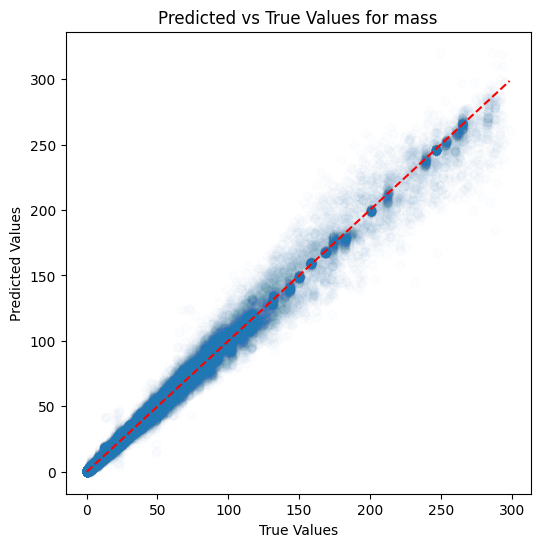

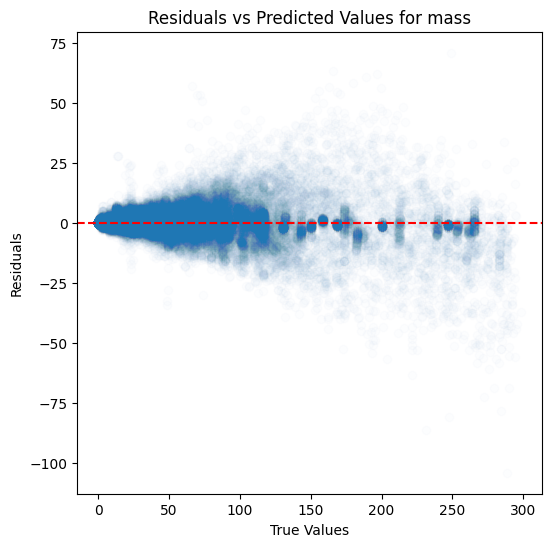

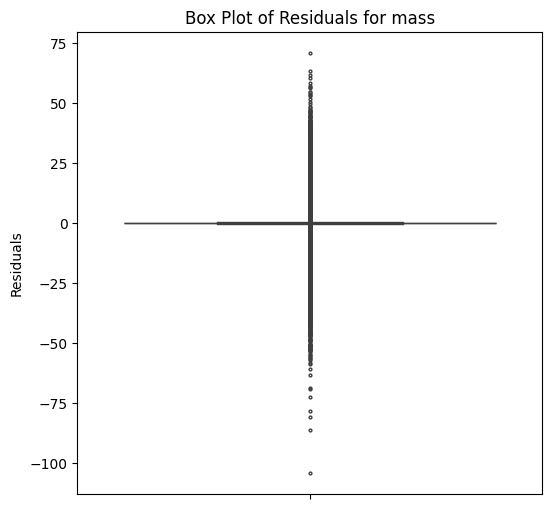

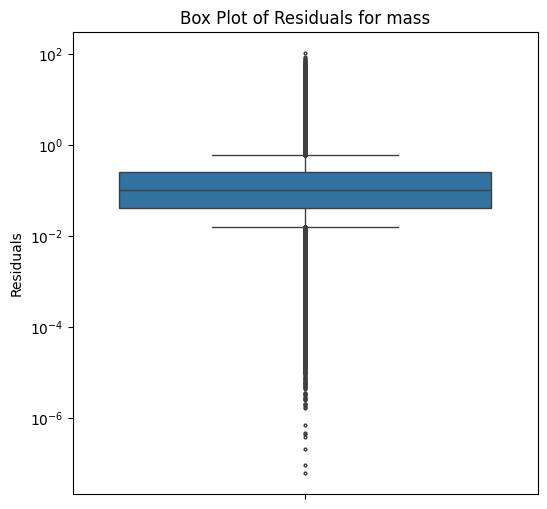

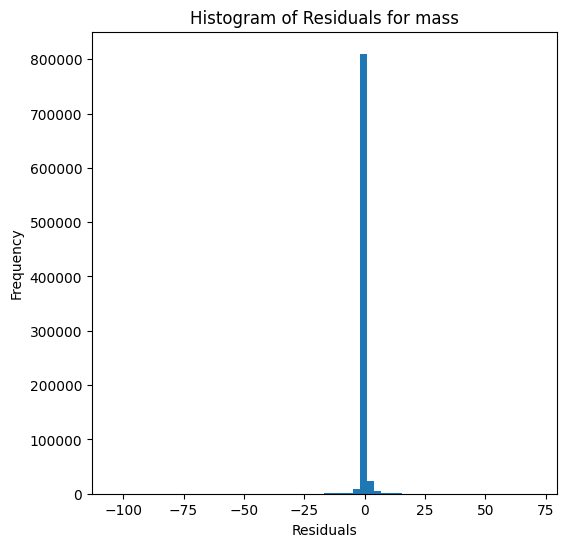

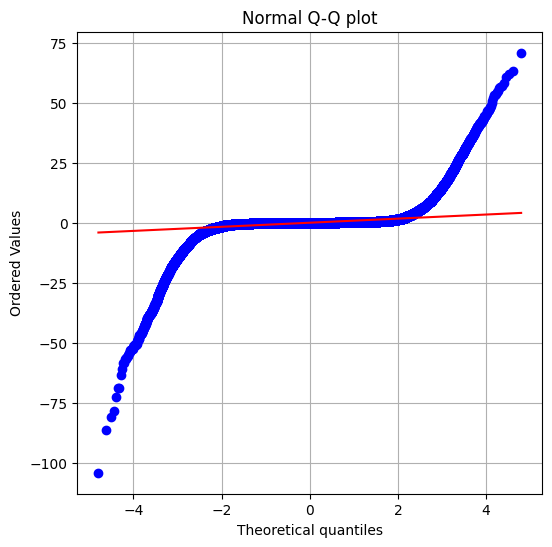


radius results:
RVE :  0.9996009897646162
RMSE :  0.018986255054897025
MAE :  0.013929692953203763
MedAE :  0.010587901199418243
CORR :  0.9998004807859229
MAX_ER :  0.4316527938038922
Percentiles : 
  75th percentile :  0.019028741333514926
  90th percentile :  0.02975907587135102
  95th percentile :  0.0381747809284718
  99th percentile :  0.06037159720940191



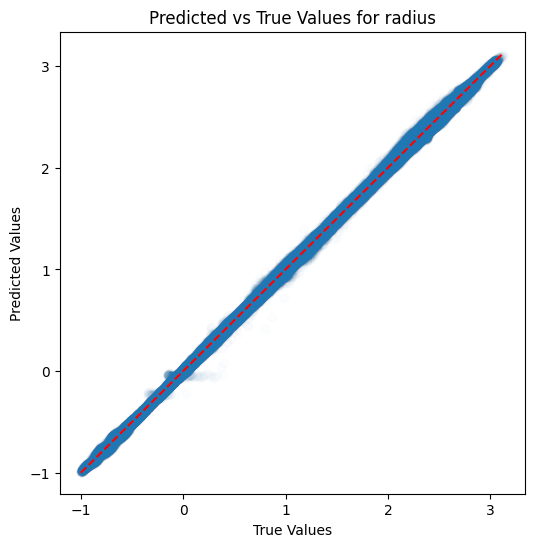

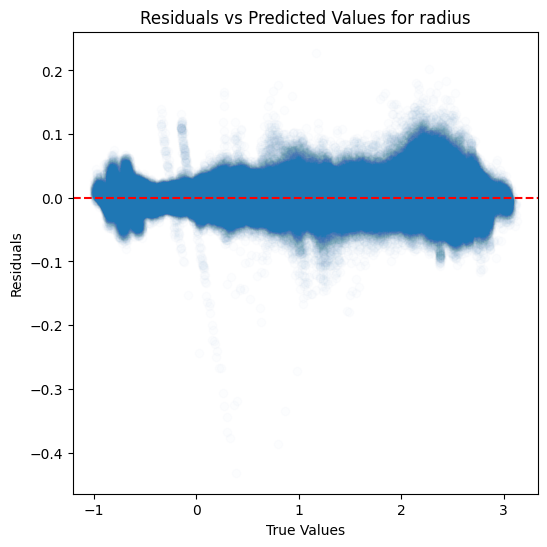

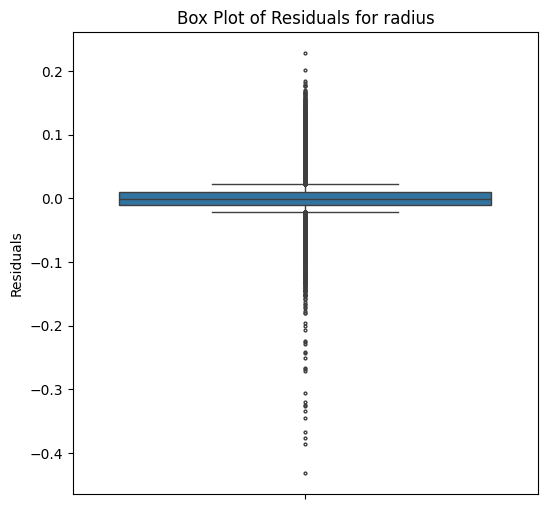

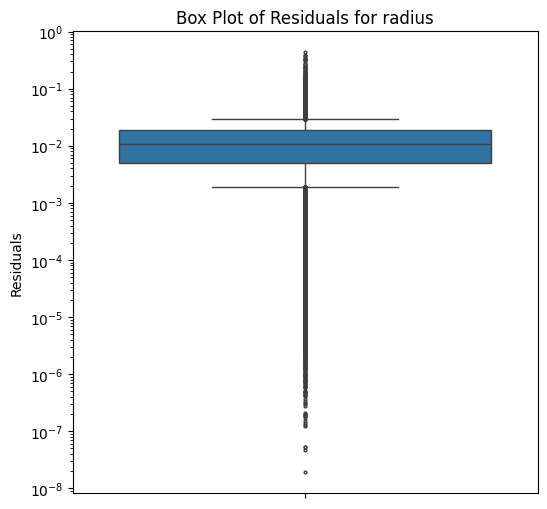

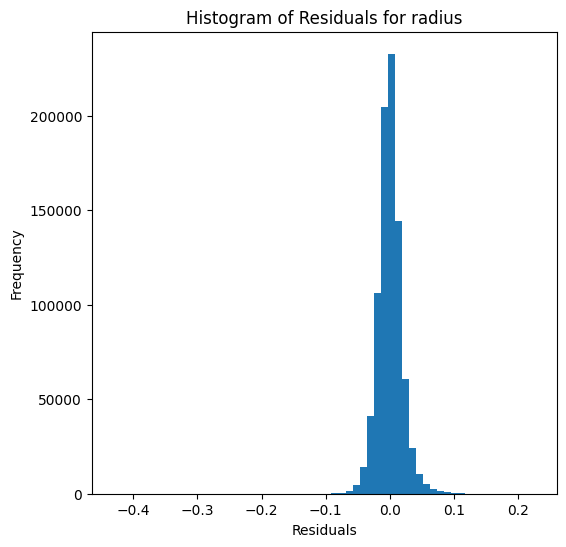

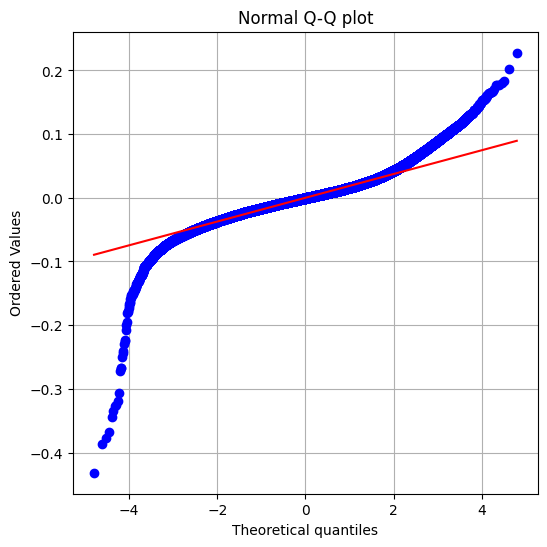

In [15]:
xgb_evaluator.evaluate_Kfold_results(XGBRegressor, X_train, y_train, "../../../../../../predictions/K_fold", "Base", random_state=12, override=True, use_preds=False, n_jobs=5) #, override=False, use_preds=True)

### Multi-layer perceptron

In [17]:
mlp_evaluator = Model_evaluator("mlp", path="../../../../../../results/K_fold/")


Base train data :
split 1 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


2.1531072948240326
2 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


2.178776105940144

mass results:
RVE :  0.984867927459382
RMSE :  2.5335132759292107
MAE :  0.7276983504493552
MedAE :  0.3034009994265745
CORR :  0.9927285673947535
MAX_ER :  169.74348568157313
Percentiles : 
  75th percentile :  0.5113604728134682
  90th percentile :  1.1025928446049704
  95th percentile :  2.1347654852226015
  99th percentile :  9.897101952249908



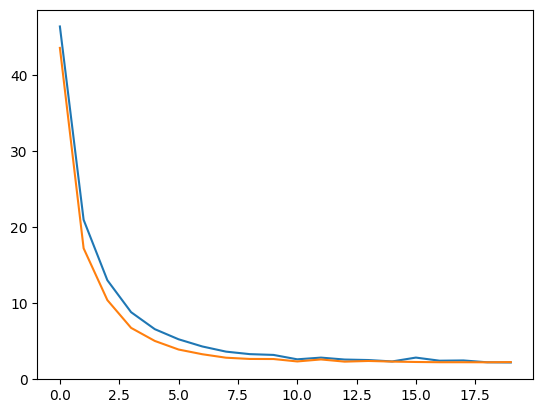

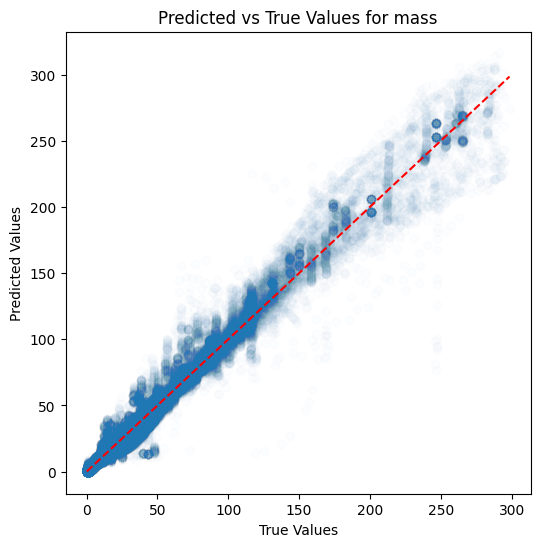

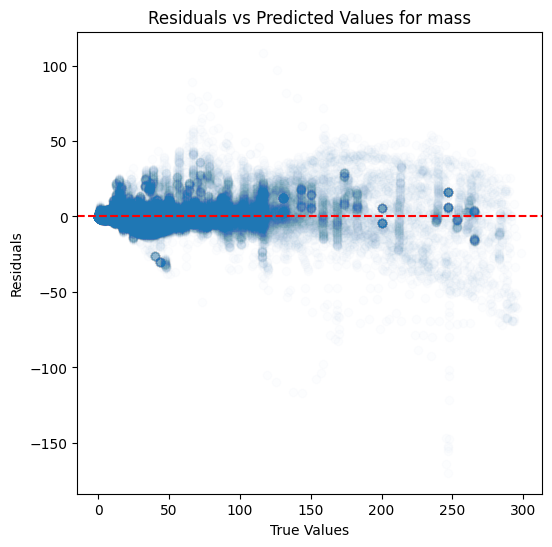

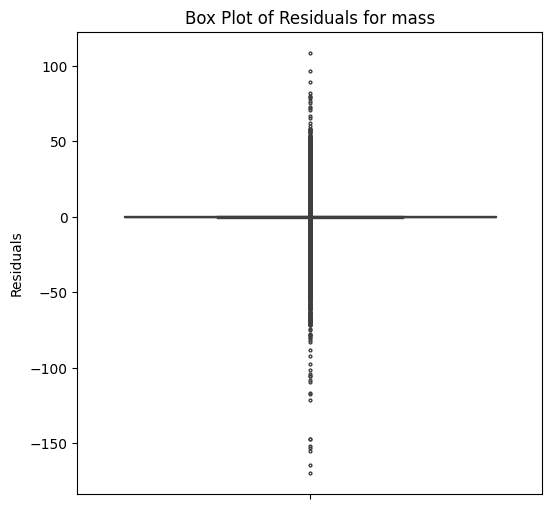

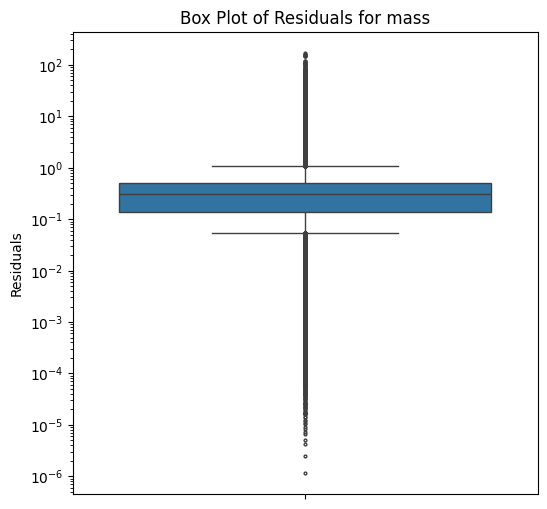

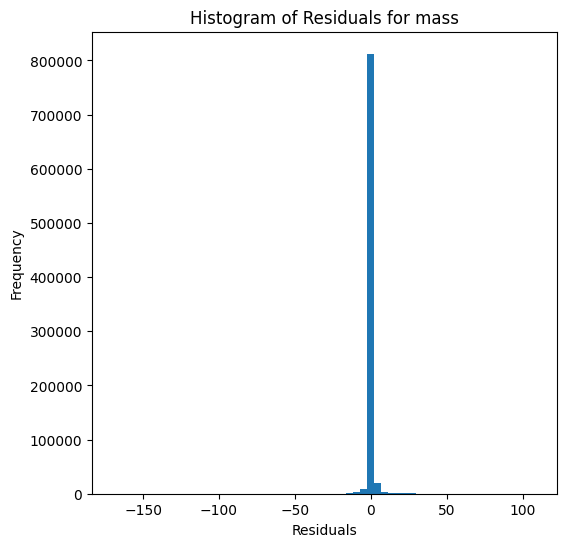

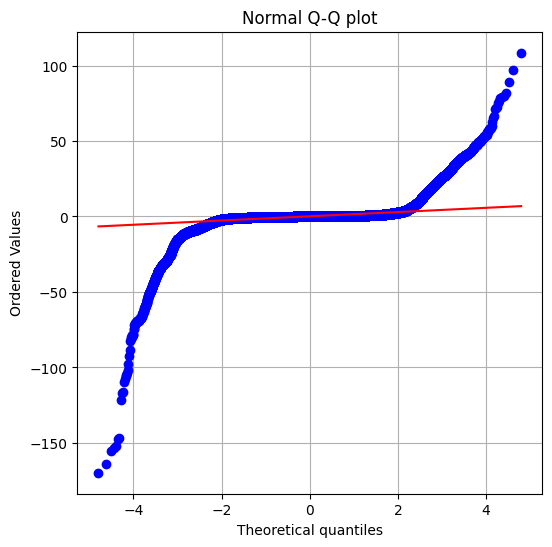


radius results:
RVE :  0.9975048151907563
RMSE :  0.047524406052913894
MAE :  0.035061777772895264
MedAE :  0.02729202616174825
CORR :  0.998764979211493
MAX_ER :  0.5243412073015707
Percentiles : 
  75th percentile :  0.04776896340292247
  90th percentile :  0.07246245668397848
  95th percentile :  0.09275063300268684
  99th percentile :  0.15526037462233608



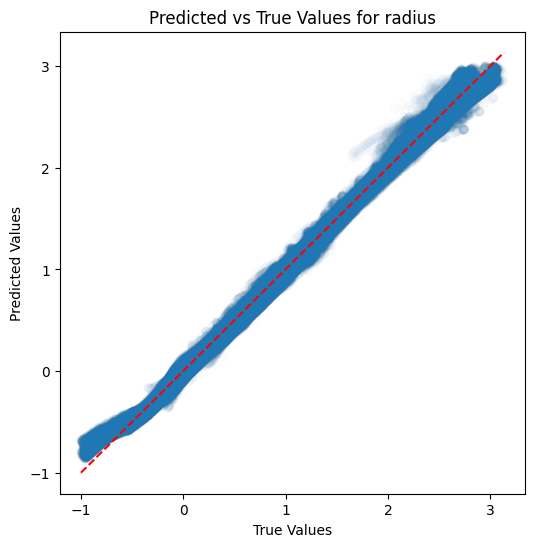

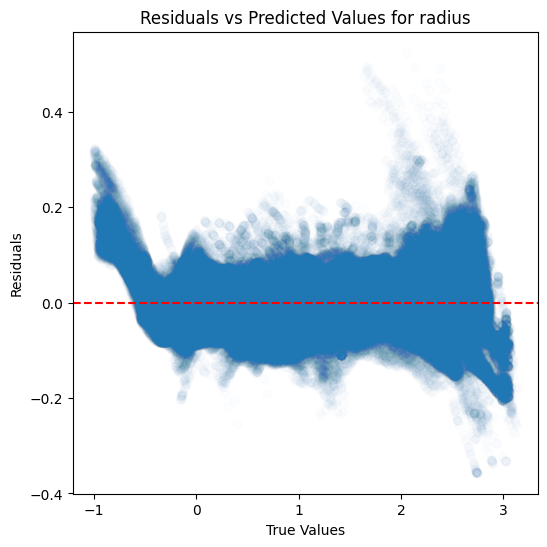

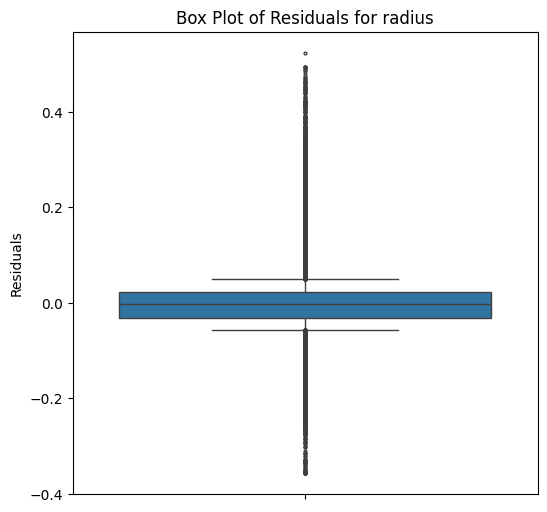

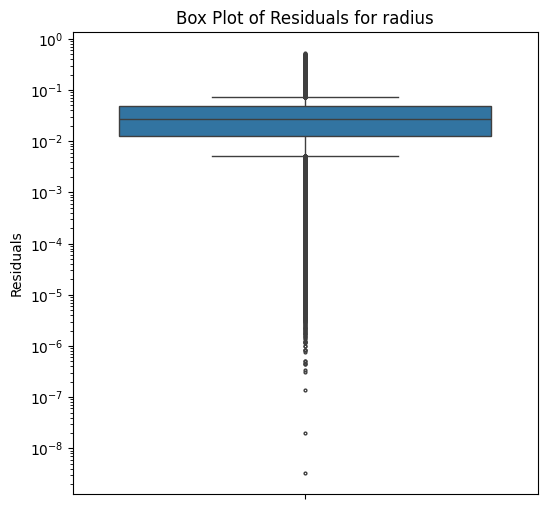

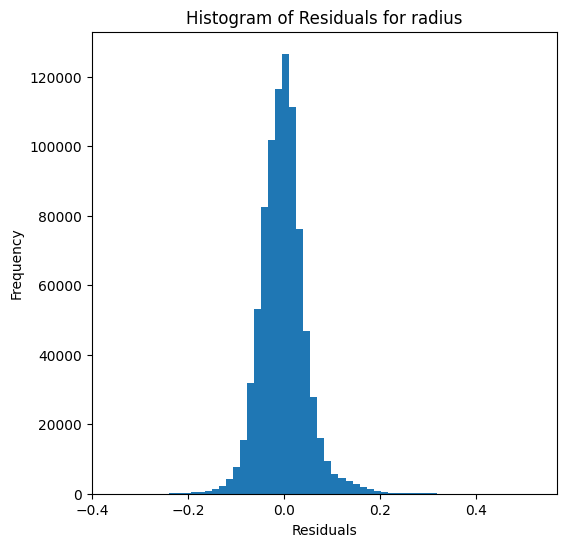

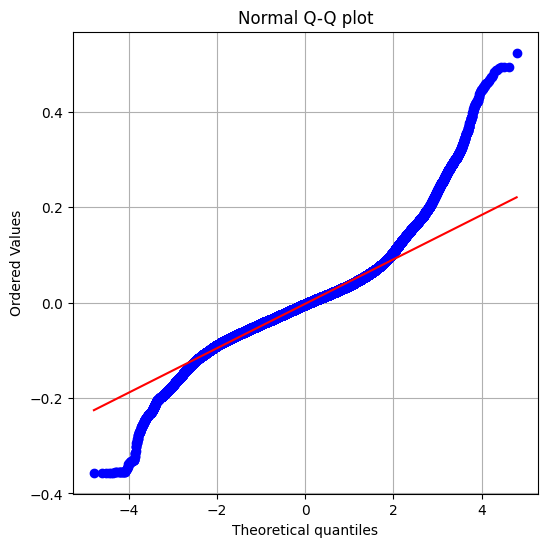

In [22]:
mlp_evaluator.evaluate_Kfold_results(MLPRegressor, X_train, y_train, "../../../../../../predictions/K_fold", "Base", n_splits=2, random_state=12, override=True, use_preds=False, hidden_layer_sizes = (100, 100), max_iter=20, batch_size=200) #, override=False, use_preds=True)

Avec batch_size=auto (200):

plus de 30 minutes pour entrainer un seul split de Kfold avec les paramètres par défaut (1 hidden layer de taille 100)

plus de 15 minutes pour entrainer un seul split de Kfold avec les 1 hidden layer de taille 10

- et max_iter=20, hidden_layer_sizes=(100, 50, 25): ~5 minutes par fold (plutôt bon résultats)
- et max_iter=20, hidden_layer_sizes=(100, 100, 100): ~5 minutes par fold

Avec batch_size=400:


Avec learning_rate= :


hidden_layer_sizes = (100, 100), max_iter=20, batch_size=200 => 17 min pour 2 splits et min_loss de 2.1
RMSE = RVE :  0.984867927459382
RMSE :  2.5335132759292107
MAE :  0.7276983504493552
MedAE :  0.3034009994265745
CORR :  0.9927285673947535
MAX_ER :  169.74348568157313
Percentiles : 75th percentile :  0.5113604728134682 90th percentile :  1.1025928446049704 95th percentile :  2.1347654852226015 99th percentile :  9.897101952249908)

hidden_layer_sizes = (100, 100), max_iter=20, batch_size=400 => 7 min pour 2 splits et min_loss de 2.2

hidden_layer_sizes = (100, 100), max_iter=20, batch_size=800 => 3 min pour 2 splits et min_loss de 2.3 et 2.7

hidden_layer_sizes = (100, 100), max_iter=20, batch_size=1600 => 3 min 30 pour 2 splits et min_loss de 7.8 et 3.8

=> batch_size plus grand == plus rapide mais moins bon